In [1]:
#import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [2]:
#load data

fea = pd.read_csv('faces_fea.csv',header=None)

# Data is saved in a dataframe 'fea' where rows are images (n=2414) and columns are pixels (m=32*32=1024)
# To plot the images as 2-D you first need to reshape each column (1-D) into a 2-D matrix
# This is done for you below in the examples that plot the images 

In [3]:
#open up data to see what we're working with -- note that pixel values range from 0 to 255

fea.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,82,81,72,72,40,93,119,129,135,121,...,91,89,92,75,80,67,57,35,33,22
1,86,86,74,67,47,66,87,101,118,132,...,89,82,87,69,60,57,41,20,14,9
2,76,88,80,62,60,20,22,40,75,137,...,80,73,70,52,37,37,16,9,6,6
3,15,16,22,11,23,8,7,7,6,4,...,14,12,9,11,9,10,7,7,5,5
4,70,69,48,64,46,109,138,147,136,102,...,94,88,83,65,74,78,66,45,39,34


In [9]:
#normalize data to range from 0 to 1; recheck what it looks like

fea/=fea.max().max()

fea.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.321569,0.317647,0.282353,0.282353,0.156863,0.364706,0.466667,0.505882,0.529412,0.474510,...,0.356863,0.349020,0.360784,0.294118,0.313725,0.262745,0.223529,0.137255,0.129412,0.086275
1,0.337255,0.337255,0.290196,0.262745,0.184314,0.258824,0.341176,0.396078,0.462745,0.517647,...,0.349020,0.321569,0.341176,0.270588,0.235294,0.223529,0.160784,0.078431,0.054902,0.035294
2,0.298039,0.345098,0.313725,0.243137,0.235294,0.078431,0.086275,0.156863,0.294118,0.537255,...,0.313725,0.286275,0.274510,0.203922,0.145098,0.145098,0.062745,0.035294,0.023529,0.023529
3,0.058824,0.062745,0.086275,0.043137,0.090196,0.031373,0.027451,0.027451,0.023529,0.015686,...,0.054902,0.047059,0.035294,0.043137,0.035294,0.039216,0.027451,0.027451,0.019608,0.019608
4,0.274510,0.270588,0.188235,0.250980,0.180392,0.427451,0.541176,0.576471,0.533333,0.400000,...,0.368627,0.345098,0.325490,0.254902,0.290196,0.305882,0.258824,0.176471,0.152941,0.133333


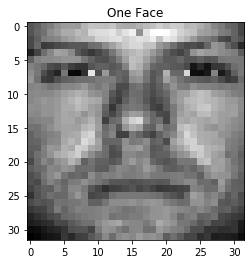

In [5]:
#plot a face

faceW = 32 #number of pixels in image width
faceH = 32 #number of pixels i|n image height
one_face = np.reshape(np.asarray(fea.iloc[0,:]),(faceH,faceW)).T

plt.imshow(one_face,cmap='gray')
plt.title('One Face')
plt.show()

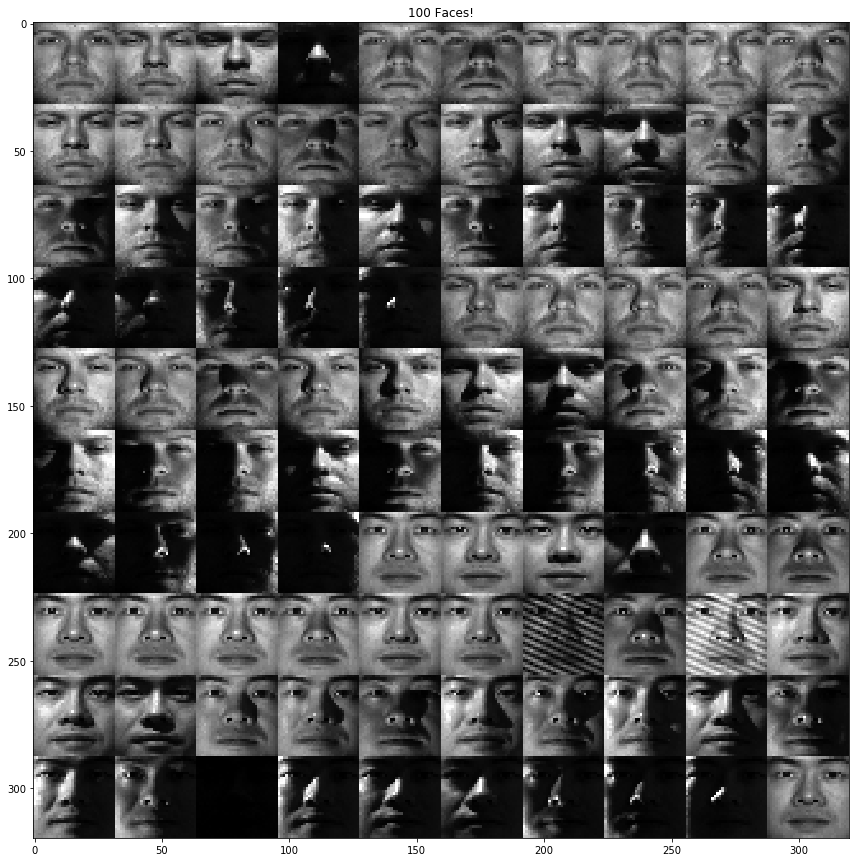

In [6]:
#plot 100 faces!

numPerLine = 10;
showLine = 10;

hundred_faces = np.empty((faceH*showLine,faceW*numPerLine))

kk = 0 
for ii in range(showLine):
    for jj in range(numPerLine):
        hundred_faces[ii*faceH:(ii+1)*faceH, jj*faceW:(jj+1)*faceW] = np.reshape(np.asarray(fea.iloc[kk,:]),(faceW,faceH)).T
        kk+=1
        
plt.figure(figsize=(15,15))
plt.imshow(hundred_faces,cmap='gray')
plt.title('100 Faces!')
plt.show()

SOLUTIONS

Find the eigenvectors of the face dataset

In [10]:
#do PCA using built-in library

n_modes = np.shape(fea)[1]
pca = PCA(n_components = n_modes)
fea_demean = fea.sub(fea.mean(axis=1), axis=0)
PCs = pca.fit_transform(fea)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

In [118]:
#alternatively, do PCA from scratch (gives same results as above)

x = fea.T
x -= x.mean().mean()
s = np.cov(x)
eigvals2,eigvecs2 = np.linalg.eig(s)
fracVar2 = eigvals2/np.sum(eigvals2)
PCs2 = eigvecs2.T @ x

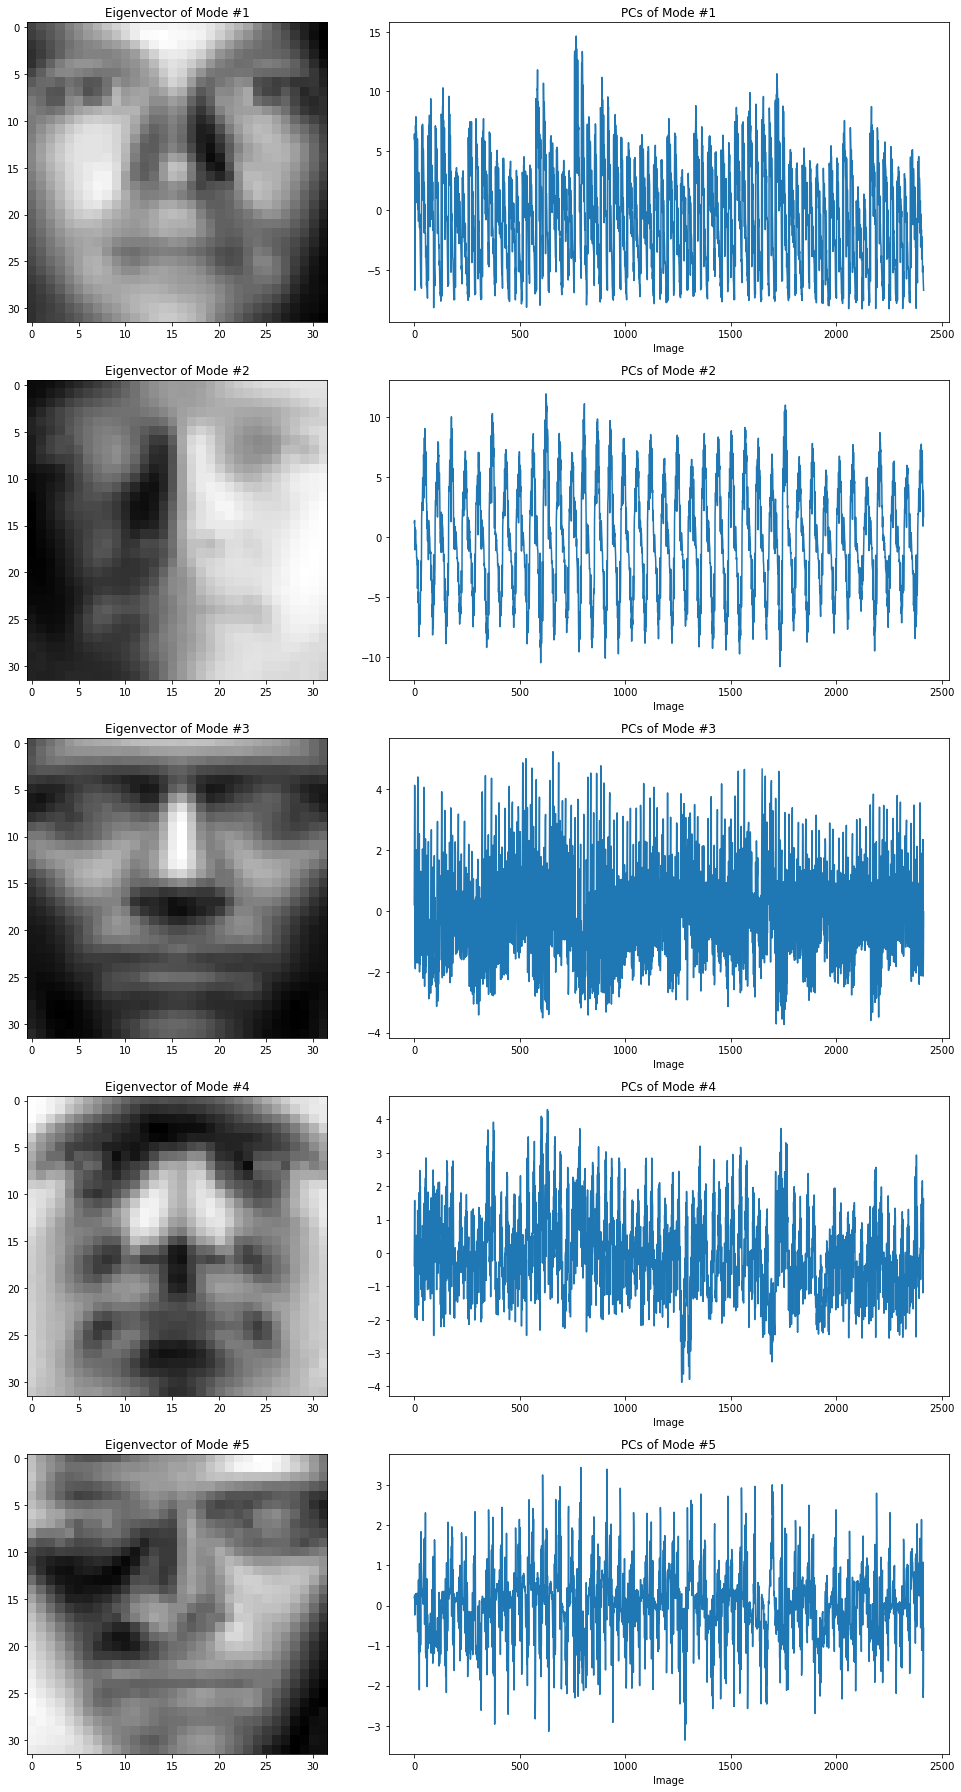

In [11]:
#plot the first n modes and PCs

n = 5

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.imshow(np.reshape(eigvecs[kk,:],(faceW,faceH)).T,cmap='gray')
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Image')
    
    plt.tight_layout()

In [14]:
# Ok, so we've chosen to keep the first 7 modes.  Now, reconstruct faces.

numModes = 7
numImages = 2414

fea_rec = np.empty_like(fea)
fea_mean = fea.mean(axis=1)

for kk in range(numImages): #for each image
    
    this_face_rec = np.zeros_like(fea.iloc[0,:])
    
    for mode in range(numModes):
        
        this_face_rec += eigvecs[mode,:]*PCs[kk,mode]
        
    fea_rec[kk,:] = this_face_rec
    
fea_rec += fea.mean().mean()

    

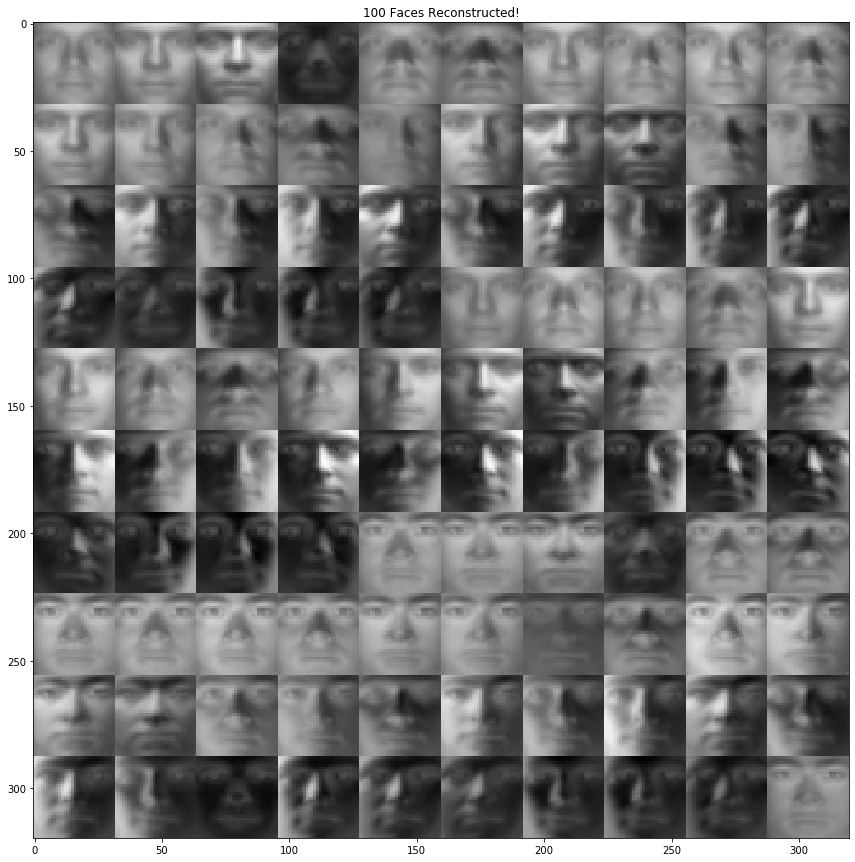

In [15]:
#plot 100 reconstructed faces!

numPerLine = 10;
showLine = 10;

hundred_faces_rec = np.empty((faceH*showLine,faceW*numPerLine))

kk = 0 
for ii in range(showLine):
    for jj in range(numPerLine):
        hundred_faces_rec[ii*faceH:(ii+1)*faceH, jj*faceW:(jj+1)*faceW] = np.reshape(np.asarray(fea_rec[kk,:]),(faceW,faceH)).T
        kk+=1
        
plt.figure(figsize=(15,15))
plt.imshow(hundred_faces_rec,cmap='gray')
plt.title('100 Faces Reconstructed!')
plt.show()

What is the most 'generic' face in the set of images?  i.e. what is the reconstructed face which is most similar to its original face?

In [16]:
#find minimum RMSE between reconstruction and original

error = fea - fea_rec
RMSE = np.sqrt(np.sum(error**2,axis=1)/32/32)

minRMSE = np.min(RMSE)
ind_minRMSE = np.argmin(RMSE)

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


Text(0.5, 1.0, 'Reconstructed Face')

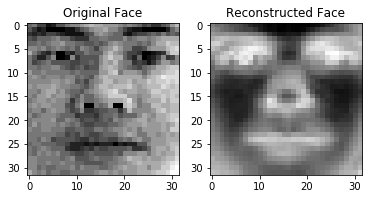

In [17]:
#plot most generic face

plt.subplot(1,2,1)
plt.imshow(np.reshape(np.asarray(fea.iloc[ind_minRMSE,:]),(faceW,faceH)).T,cmap='gray')
plt.title('Original Face')

plt.subplot(1,2,2)
plt.imshow(np.reshape(np.asarray(fea_rec[ind_minRMSE,:]),(faceW,faceH)).T,cmap='gray')
plt.title('Reconstructed Face')

In [18]:
#it turns out that the most similar original face was mostly... not a face at all!
#look into which other faces also have low RMSE values

RMSE_sort = np.sort(RMSE)
RMSE_sort_inds = np.argsort(RMSE,axis=0)

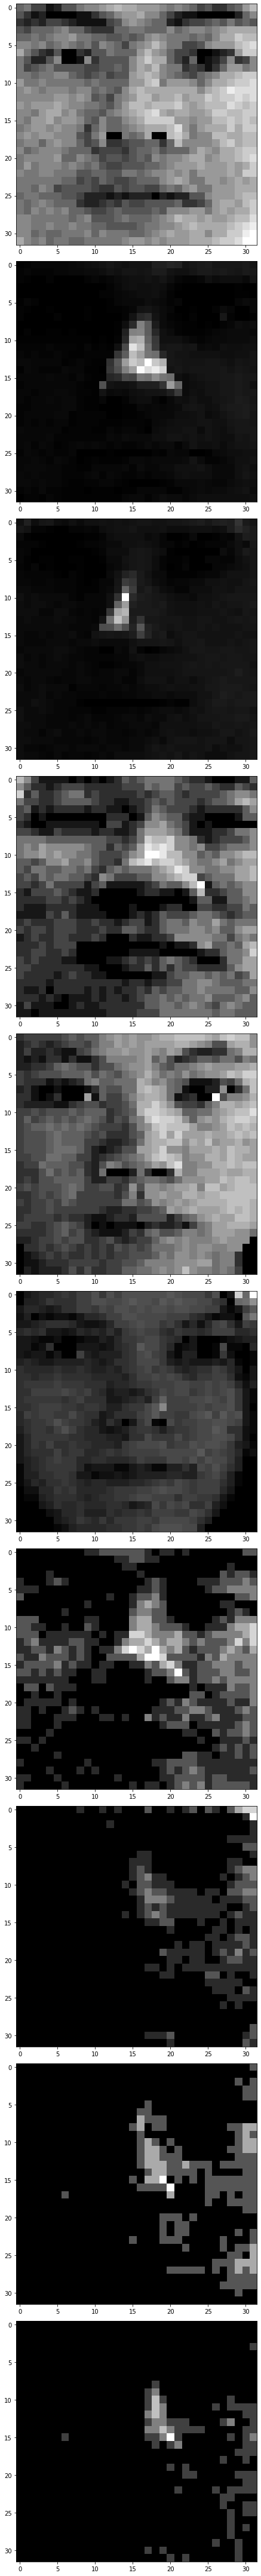

In [20]:
#plot 10 most 'generic' faces

N = 10

plt.figure(figsize=(10,6*N))

for kk in range(N):
    
    plt.subplot(N,1,kk+1)
    plt.imshow(np.reshape(np.asarray(fea.iloc[RMSE_sort_inds[kk],:]),(faceW,faceH)).T,cmap='gray')
        
    plt.tight_layout()